# Credit EDA & Credit Score Calculation with Python
## Problem statement:
  - To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.
### Suggestions for learners:

## **Exploratory Data Analysis (EDA):**

- Perform a comprehensive EDA to understand the data's structure, characteristics, distributions, and relationships.
Identify and address any missing values, mismatch data types, inconsistencies, or outliers.
- Utilize appropriate visualizations (e.g., histograms, scatter plots, box plots, correlation matrices) to uncover patterns and insights.

##  Feature Engineering:

- Create new features that can be leveraged for the calculation of credit scores based on domain knowledge and insights from EDA.
Aggregate the data on the customer level if required

## Hypothetical Credit Score Calculation:

- Develop a methodology to calculate a hypothetical credit score using relevant features(use a minimum of 5 maximum of 10 features).
- Clearly outline the developed methodology in the notebook, providing a detailed explanation of the reasoning behind it. (use inspiration from FICO scores and try to use relevant features you created)
- Explore various weighting schemes to assign scores.
- Provide a score for each individual customer

##Analysis and Insights

- Add valuable insights from EDA and credit score calculation
Can credit score and aggregated features be calculated at different time frames like the last 3 months/last 6 months (recency based metrics)

## Data Description

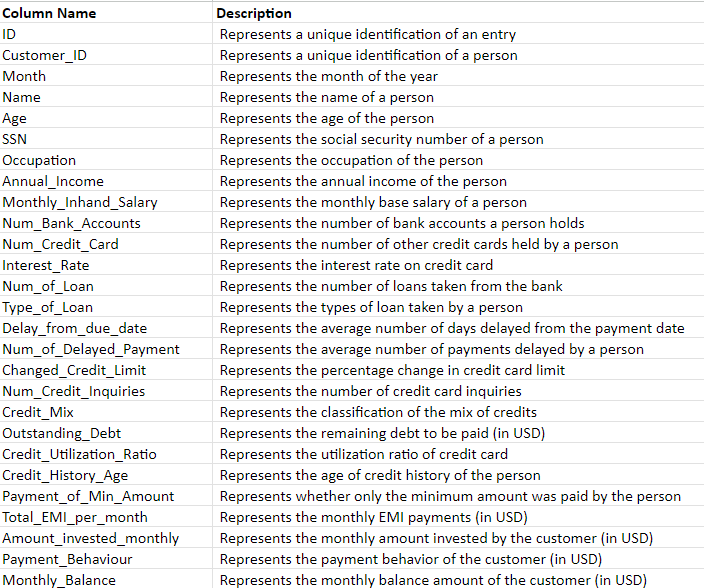

## Colab Link :
https://colab.research.google.com/drive/1zDlNvaWmytj4PFwQwOkdYCqaU-d2l_5i?usp=sharing

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [11]:
df = pd.read_csv('/content/drive/MyDrive/fintech/Credit_score.csv')

In [12]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [13]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [14]:
df1 = df.copy()

In [15]:
df1.shape

(100000, 27)

In [16]:
df1.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

# Treating outliers and missing columns

## 1) Name Column :

- Handled missing data by forward-filling within customer segments.

In [17]:
df1['Name'] = df1.groupby('Customer_ID')['Name'].fillna(method='ffill')

## 2) Age

- Eliminated redundant symbols within the column data.
- Addressed missing data points through forward and backward imputation for each customer group.
- Imposed an upper age limit of 95.



In [18]:
df1['Age'].nunique()

1788

In [19]:
df1['Age']=df1['Age'].str.replace('-',"")
df1['Age']=df1['Age'].str.replace('_',"")
df1['Age'] = df1['Age'].astype('int')

df1['Age'].dtypes

dtype('int64')

In [20]:
df1['Age'].unique()

array([  23,  500,   28, ..., 4808, 2263, 1342])

In [21]:
def Age(group):
    mode_age = group['Age'].mode()[0]
    group['Age'] = group['Age'].apply(lambda y: mode_age if y >= 95 else y)
    return group

# Apply the function to each group
df2 = df1.groupby('Customer_ID').apply(Age)
df2 = df2.reset_index(drop=True)


df1 =df2
df1['Age'].nunique()

43

## SSN Number

- Eliminated redundant symbols within the column data.
- Addressed missing data points through forward and backward imputation for each customer group.

In [22]:
# df1.groupby('Customer_ID')['SSN'].apply(lambda y : None if y == '#F%$D@*&8' else y['SSN'] )
df1['SSN'] = df1['SSN'].replace("#F%$D@*&8", np.nan)
df1['SSN'].isna().sum()
def SSN(group):
    mode_ssn = group['SSN'].mode()[0]  # Calculate the mode of the 'SSN' column
    group['SSN'] = group['SSN'].apply(lambda y: mode_ssn if pd.isna(y) else y)
    return group

# Apply the function to each group
df2 = df1.groupby('Customer_ID').apply(SSN)
df2 = df2.reset_index(drop=True)
df1 = df2


## Occupation
- Eliminated redundant symbols within the column data.
- Addressed missing data points through forward and backward imputation for each customer group.

In [23]:
df1['Occupation'].replace('_______',"").unique()

array(['Lawyer', 'Mechanic', '', 'Media_Manager', 'Doctor', 'Journalist',
       'Accountant', 'Manager', 'Entrepreneur', 'Scientist', 'Architect',
       'Teacher', 'Engineer', 'Writer', 'Developer', 'Musician'],
      dtype=object)

In [24]:
df1['Occupation'] = df1['Occupation'].replace('_______',"")
df1['Occupation'] = df1['Occupation'].replace("",np.nan)
df1['Occupation'] = df1.groupby('Customer_ID')['Occupation'].fillna(method='ffill')
df1['Occupation'] = df1.groupby('Customer_ID')['Occupation'].fillna(method='bfill')

## Treating numeric columns

- Eliminated redundant symbols within the column data.
- Addressed missing data points through forward and backward imputation for each customer group.
- Performed mathematical corrections for neccessary columns
- Imposed upper limit to neccessary columns.


In [25]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
df1['Annual_Income'] = df1['Annual_Income'].str.replace('_',"").astype('float')

In [26]:
df1['Monthly_Inhand_Salary'] = df1.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill')
df1['Monthly_Inhand_Salary'] = df1.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='bfill')


In [27]:
columns = ['Num_Bank_Accounts','Num_Credit_Card']
for column in columns:

  df1[column] = df1[column].apply(lambda x: np.nan if x>10 else x)
  df1[column] = df1.groupby('Customer_ID')[column].fillna(method='ffill')

  df1[column] = df1.groupby('Customer_ID')[column].fillna(method='bfill')
  df1[column] = df1[column].astype('int')

In [28]:
df1['Num_Bank_Accounts'].unique()


array([ 6,  1,  3,  7,  2,  5,  8,  4,  0, 10,  9, -1])

In [29]:
df1['Num_Bank_Accounts'] = df1['Num_Bank_Accounts'].apply(lambda x: -1*x if x==-1 else x)
df1['Num_Credit_Card'] = df1['Num_Credit_Card'].apply(lambda x: -1*x if x==-1 else x)

In [30]:
df1['Interest_Rate'].unique()

array([  27,   17,    1, ..., 4892, 4378, 3808])

In [31]:
df1['Interest_Rate'] = df1['Interest_Rate'].apply(lambda x : np.nan if x>45 else x)
df1['Interest_Rate'] = df1.groupby('Customer_ID')['Interest_Rate'].fillna(method='ffill')
df1['Interest_Rate'] = df1.groupby('Customer_ID')['Interest_Rate'].fillna(method='bfill')
df1['Interest_Rate'].unique()

array([27., 17.,  1.,  6., 16., 23.,  9., 11.,  2., 10., 30., 26.,  5.,
       18., 14.,  4., 24.,  8., 15., 21.,  7., 19., 31., 33., 34., 13.,
       20., 28., 32., 29., 12., 25.,  3., 22.])

In [32]:
df1['Num_of_Loan'] = df1['Num_of_Loan'].str.replace('_','')
df1['Num_of_Loan'] = df1['Num_of_Loan'].astype('int')
df1['Num_of_Loan'] = df1['Num_of_Loan'].apply(lambda x: np.nan if x>=23 or x==-100 else x)
df1['Num_of_Loan'] = df1.groupby('Customer_ID')['Num_of_Loan'].fillna(method='ffill')
df1['Num_of_Loan'] = df1.groupby('Customer_ID')['Num_of_Loan'].fillna(method='bfill')
df1['Num_of_Loan'].unique()

array([ 2.,  4.,  0.,  3.,  8.,  1.,  9.,  7.,  6.,  5., 17., 18., 19.])

In [33]:
df1['Num_of_Loan'] = df1['Num_of_Loan'].astype('int')

In [34]:
df1['Type_of_Loan'] = df1['Type_of_Loan'].fillna('Not Specified')

In [35]:
df1['Delay_from_due_date'].unique()

array([62, 64, 67, 57,  8, 10,  3,  5, 14, 19,  9, 27, 29, 12, 16,  6, 24,
        0, -5, -4,  1, 15, 28, 23, 18, 13, 11, 25, 48, 47, 50, 46,  7,  2,
       -3,  4, 30, 17, 21, 20, 22, 35, 40, 31, 26, 59, 63, 58, 37, 42, 43,
       38, 55, 41, 36, 52, 53, 54, 49, -2, 44, 39, 61, 34, 33, -1, 45, 60,
       51, 66, 56, 32, 65])

In [36]:
df1['Delay_from_due_date'] = df1['Delay_from_due_date'].apply(lambda x: -1*x if x<0 else x)
df1['Delay_from_due_date'].unique()

array([62, 64, 67, 57,  8, 10,  3,  5, 14, 19,  9, 27, 29, 12, 16,  6, 24,
        0,  4,  1, 15, 28, 23, 18, 13, 11, 25, 48, 47, 50, 46,  7,  2, 30,
       17, 21, 20, 22, 35, 40, 31, 26, 59, 63, 58, 37, 42, 43, 38, 55, 41,
       36, 52, 53, 54, 49, 44, 39, 61, 34, 33, 45, 60, 51, 66, 56, 32, 65])

In [38]:
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].str.replace('_',"")
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].str.replace('-',"")
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].astype('float64')
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x>50 else x)

In [39]:
df1['Num_of_Delayed_Payment'] = df1.groupby('Customer_ID')['Num_of_Delayed_Payment'].fillna(method='ffill')
df1['Num_of_Delayed_Payment'] = df1.groupby('Customer_ID')['Num_of_Delayed_Payment'].fillna(method='bfill')
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].astype('int')
df1['Num_of_Delayed_Payment'].unique()

array([25, 23, 28, 26, 16, 18, 19,  7,  9,  8, 12, 17, 15, 13, 10, 22, 20,
        2,  1,  5, 11, 14,  4,  3,  6, 21,  0, 24, 27, 46, 49, 47])

In [40]:
df1['Changed_Credit_Limit'] = df1['Changed_Credit_Limit'].replace('_',np.nan)
df1['Changed_Credit_Limit'] = df1.groupby('Customer_ID')['Changed_Credit_Limit'].fillna(method='ffill')
df1['Changed_Credit_Limit'] = df1.groupby('Customer_ID')['Changed_Credit_Limit'].fillna(method='bfill')

In [41]:
df1['Num_Credit_Inquiries'] = df1['Num_Credit_Inquiries'].replace('.',"")
df1['Num_Credit_Inquiries'] = df1['Num_Credit_Inquiries'].astype('float')


In [42]:
df1['Num_Credit_Inquiries'] = df1['Num_Credit_Inquiries'].apply(lambda x: np.nan if x>15 else x)
df1['Num_Credit_Inquiries'] = df1.groupby('Customer_ID')['Num_Credit_Inquiries'].fillna(method='ffill')
df1['Num_Credit_Inquiries'] = df1.groupby('Customer_ID')['Num_Credit_Inquiries'].fillna(method='bfill')
df1['Num_Credit_Inquiries'] = df1['Num_Credit_Inquiries'].astype('int')

In [43]:
df1['Credit_Mix'] = df1['Credit_Mix'].replace('_',np.nan)

df1['Credit_Mix'] = df1.groupby('Customer_ID')['Credit_Mix'].fillna(method='ffill')
df1['Credit_Mix'] = df1.groupby('Customer_ID')['Credit_Mix'].fillna(method='bfill')

In [44]:
df1['Outstanding_Debt'] = df1['Outstanding_Debt'].str.replace('_',"")
df1['Outstanding_Debt'] = df1['Outstanding_Debt'].astype('float')

In [45]:
def convert_to_months(age_str):
    if pd.isna(age_str) or age_str == 'NA':
        return np.nan
    else:
        years, months = age_str.split(' and ')
        years = int(years.split()[0])
        months = int(months.split()[0])
        return years * 12 + months
# Apply conversion
df1['Credit_months'] = df1['Credit_History_Age'].apply(convert_to_months)

In [46]:
df1['Credit_months'] = df1.groupby('Customer_ID')['Credit_months'].fillna(method='ffill')
df1['Credit_months'] = df1.groupby('Customer_ID')['Credit_months'].fillna(method='bfill')


In [47]:
df1['Credit_months'] = df1['Credit_months'].astype('int')

In [48]:
df1['Credit_months'].isna().sum()

0

In [49]:
def convert_to_years(age_str):
    if pd.isna(age_str) or age_str == 'NA':
        return np.nan
    else:
        years, months = age_str.split(' and ')
        years = int(years.split()[0])

        return years
# Apply conversion
df1['Credit_years'] = df1['Credit_History_Age'].apply(convert_to_years)


In [50]:
df1['Credit_years'] = df1.groupby('Customer_ID')['Credit_years'].fillna(method='ffill')
df1['Credit_years'] = df1.groupby('Customer_ID')['Credit_years'].fillna(method='bfill')


In [51]:
df1['Amount_invested_monthly'] = df1['Amount_invested_monthly'].str.replace('_',"")
df1['Amount_invested_monthly'] = df1.groupby('Customer_ID')['Amount_invested_monthly'].fillna(method='ffill')
df1['Amount_invested_monthly'] = df1.groupby('Customer_ID')['Amount_invested_monthly'].fillna(method='bfill')
df1['Amount_invested_monthly'] =df1['Amount_invested_monthly'].astype('float')


In [52]:
df1['Payment_Behaviour'] =df1['Payment_Behaviour'].replace('!@9#%8',np.nan)
df1['Payment_Behaviour'] = df1.groupby('Customer_ID')['Payment_Behaviour'].fillna(method='ffill')
df1['Payment_Behaviour'] = df1.groupby('Customer_ID')['Payment_Behaviour'].fillna(method='bfill')

In [53]:
df1['Payment_Behaviour'] = df1.groupby('Customer_ID')['Payment_Behaviour'].fillna(method='ffill')
df1['Payment_Behaviour'] = df1.groupby('Customer_ID')['Payment_Behaviour'].fillna(method='bfill')

In [54]:
df1['Monthly_Balance'].dtypes

dtype('O')

In [55]:
df1['Monthly_Balance'] = df1.groupby('Customer_ID')['Monthly_Balance'].fillna(method='ffill')
df1['Monthly_Balance'] = df1.groupby('Customer_ID')['Monthly_Balance'].fillna(method='bfill')
df1['Monthly_Balance'] = df1['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)
df1['Monthly_Balance'] = df1['Monthly_Balance'].astype('float')

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      98630 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [57]:
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_months,Credit_years
0,0x1628a,CUS_0x1000,January,Alistair Barrf,17,913-74-1218,Lawyer,30625.940000,2706.161667,6,...,1562.910000,26.612093,10 Years and 2 Months,Yes,42.941090,244.750283,Low_spent_Large_value_payments,252.924793,122,10.000000
1,0x1628b,CUS_0x1000,February,Alistair Barrf,17,913-74-1218,Lawyer,30625.940000,2706.161667,6,...,1562.910000,29.439759,10 Years and 3 Months,Yes,42.941090,176.132567,High_spent_Small_value_payments,311.542510,123,10.000000
2,0x1628c,CUS_0x1000,March,Alistair Barrf,17,913-74-1218,Lawyer,30625.940000,2706.161667,6,...,1562.910000,38.285928,10 Years and 4 Months,Yes,42.941090,109.056519,High_spent_Medium_value_payments,368.618558,124,10.000000
3,0x1628d,CUS_0x1000,April,Alistair Barrf,17,913-74-1218,Lawyer,30625.940000,2706.161667,6,...,1562.910000,32.843081,10 Years and 5 Months,Yes,42.941090,87.909909,High_spent_Medium_value_payments,419.765167,125,10.000000
4,0x1628e,CUS_0x1000,May,Alistair Barrf,17,913-74-1218,Lawyer,30625.940000,2706.161667,6,...,1562.910000,32.330508,10 Years and 6 Months,Yes,42.941090,191.834767,Low_spent_Large_value_payments,305.840309,126,10.000000


In [58]:
df1['Changed_Credit_Limit'] = df1['Changed_Credit_Limit'].astype('float')

# Downloading the Cleaned data

In [61]:
df1.to_csv('cleaned_credit_info.csv')

# Importing the cleaned data

In [62]:
df1 = pd.read_csv('/content/cleaned_credit_info.csv')

In [63]:
df1.describe()

,Unnamed: 0,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_months,Credit_years
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99991.000000,100000.000000,100000.000000
mean,49999.500000,33.311180,176415.701298,4198.771619,5.368920,5.533280,14.532080,3.533380,21.095040,13.339380,10.389303,5.736650,1426.220376,32.285173,1403.118217,637.633413,403.059419,221.136220,17.962100
std,28867.657797,10.764783,1429618.051414,3187.494354,2.592706,2.066208,8.741330,2.447604,14.822802,6.266742,6.789784,3.782904,1155.129026,5.116875,8306.041270,2043.334171,214.796687,99.680454,8.314821
min,0.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,1.000000,0.000000
25%,24999.750000,24.000000,19457.500000,1626.761667,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.593976,270.031224,144.000000,12.000000
50%,49999.500000,33.000000,37578.610000,3096.378333,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,69.249473,135.952228,337.080742,219.000000,18.000000
75%,74999.250000,42.000000,72790.920000,5961.745000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.860000,8.000000,1945.962500,36.496663,161.224249,266.178173,471.545719,302.000000,25.000000
max,99999.000000,56.000000,24198062.000000,15204.633330,10.000000,10.000000,34.000000,19.000000,67.000000,49.000000,36.970000,15.000000,4998.070000,50.000000,82331.000000,10000.000000,1602.040519,404.000000,33.000000


In [64]:
df1.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1628a,1
Customer_ID,100000,12500,CUS_0x1000,8
Month,100000,8,January,12500
Name,98630,10139,Langep,48
SSN,100000,12500,913-74-1218,8
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6260,Not Specified,12816
Credit_Mix,100000,3,Standard,45848
Credit_History_Age,90970,404,15 Years and 11 Months,446
Payment_of_Min_Amount,100000,3,Yes,52326


- There is a total of 12500 unique customers.
- The data is from January to August.
- Low_spent_Small_value_payments has high frequency	27588
-  Standard has highest frequency from credit mix categories.


In [65]:
['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_months', 'Credit_years']

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_months',
 'Credit_years']

In [66]:
df1['Customer_ID'].nunique()

12500

In [67]:
df1[['Customer_ID','Month']][df1['Month']=='August'].count()

Customer_ID    12500
Month          12500
dtype: int64

-

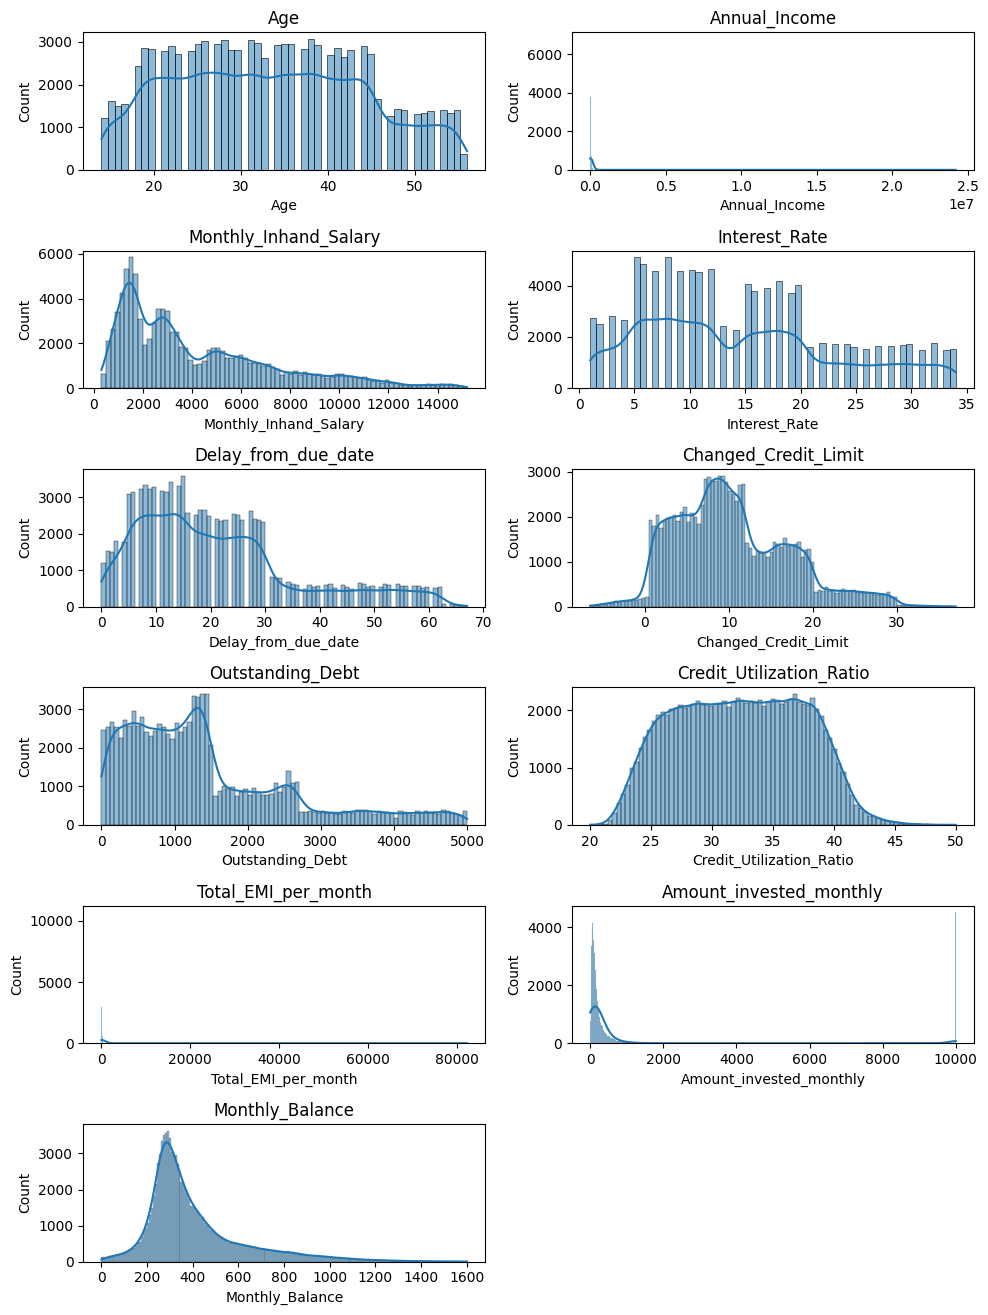

In [68]:
numericals_feature = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
        'Interest_Rate',
       'Delay_from_due_date',  'Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
      ]
plt.figure(figsize=(10,15))

for i in range(1, len(numericals_feature) + 1):
    plt.subplot(7, 2, i)
    sns.histplot(df1[numericals_feature[i-1]], kde=True)
    plt.title(numericals_feature[i-1])

plt.tight_layout()
plt.show()


Insights:
- The distribution of age is relatively uniform, with a slight peak around the mid-20s to early 30s.
- There is a noticeable drop in the number of individuals above the age of 50.
- fewer individuals earning very high monthly inhand salaries.
- The interest rate distribution is fairly uniform, with small peaks around 10-15% and another around 20-25%.
- The delay from the due date has a broad distribution with many individuals experiencing delays of up to 30 days.
- Most changes in credit limits are moderate, with few instances of very high adjustments.
- The distribution shows a high frequency of individuals with outstanding debt in the range of 0 to 2000 units.
- The majority of individuals maintain a credit utilization ratio within the 20% to 40% range, indicating good credit management practices.
- Monthly EMI payments are generally low, suggesting that most individuals do not have heavy debt burdens from EMIs.
- Most individuals invest small amounts monthly, indicating cautious or limited investment behavior.

In [69]:
num = df1[['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_months', 'Credit_years']]

data = num.corr()

In [70]:
data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_months,Credit_years
Age,1.000000,0.006235,0.090623,-0.190335,-0.148567,-0.217531,-0.213355,-0.173892,-0.183664,-0.156400,-0.252376,-0.202361,0.025523,0.001698,0.005982,0.117456,0.234635,0.234569
Annual_Income,0.006235,1.000000,0.030508,-0.009087,-0.001941,-0.006702,-0.005440,-0.010670,-0.006277,0.000974,-0.010166,-0.003706,0.010316,-0.000248,-0.004870,0.019595,-0.000728,-0.000602
Monthly_Inhand_Salary,0.090623,0.030508,1.000000,-0.283243,-0.216958,-0.301906,-0.254155,-0.249300,-0.284396,-0.175135,-0.281860,-0.269078,0.176081,0.007949,0.060218,0.702733,0.271516,0.271353
Num_Bank_Accounts,-0.190335,-0.009087,-0.283243,1.000000,0.442680,0.584291,0.472152,0.559748,0.600354,0.330958,0.521339,0.507045,-0.071768,-0.006347,-0.020602,-0.299794,-0.485379,-0.485136
Num_Credit_Card,-0.148567,-0.001941,-0.216958,0.442680,1.000000,0.497984,0.417853,0.479584,0.423026,0.252972,0.461477,0.490458,-0.055226,-0.006707,-0.012972,-0.237985,-0.417292,-0.416897
Interest_Rate,-0.217531,-0.006702,-0.301906,0.584291,0.497984,1.000000,0.558829,0.588961,0.570526,0.366691,0.635864,0.629414,-0.075700,-0.005090,-0.019056,-0.328302,-0.576232,-0.575842
Num_of_Loan,-0.213355,-0.005440,-0.254155,0.472152,0.417853,0.558829,1.000000,0.501107,0.473902,0.369754,0.569524,0.638430,-0.100519,-0.001299,-0.015701,-0.433099,-0.605423,-0.605024
Delay_from_due_date,-0.173892,-0.010670,-0.249300,0.559748,0.479584,0.588961,0.501107,1.000000,0.540812,0.293042,0.542037,0.571988,-0.063872,-0.003925,-0.013146,-0.280824,-0.491235,-0.490882
Num_of_Delayed_Payment,-0.183664,-0.006277,-0.284396,0.600354,0.423026,0.570526,0.473902,0.540812,1.000000,0.325241,0.502722,0.504337,-0.074034,-0.005061,-0.024785,-0.304166,-0.481654,-0.481477
Changed_Credit_Limit,-0.156400,0.000974,-0.175135,0.330958,0.252972,0.366691,0.369754,0.293042,0.325241,1.000000,0.383301,0.458383,-0.047896,-0.002380,-0.011481,-0.204833,-0.424855,-0.424580


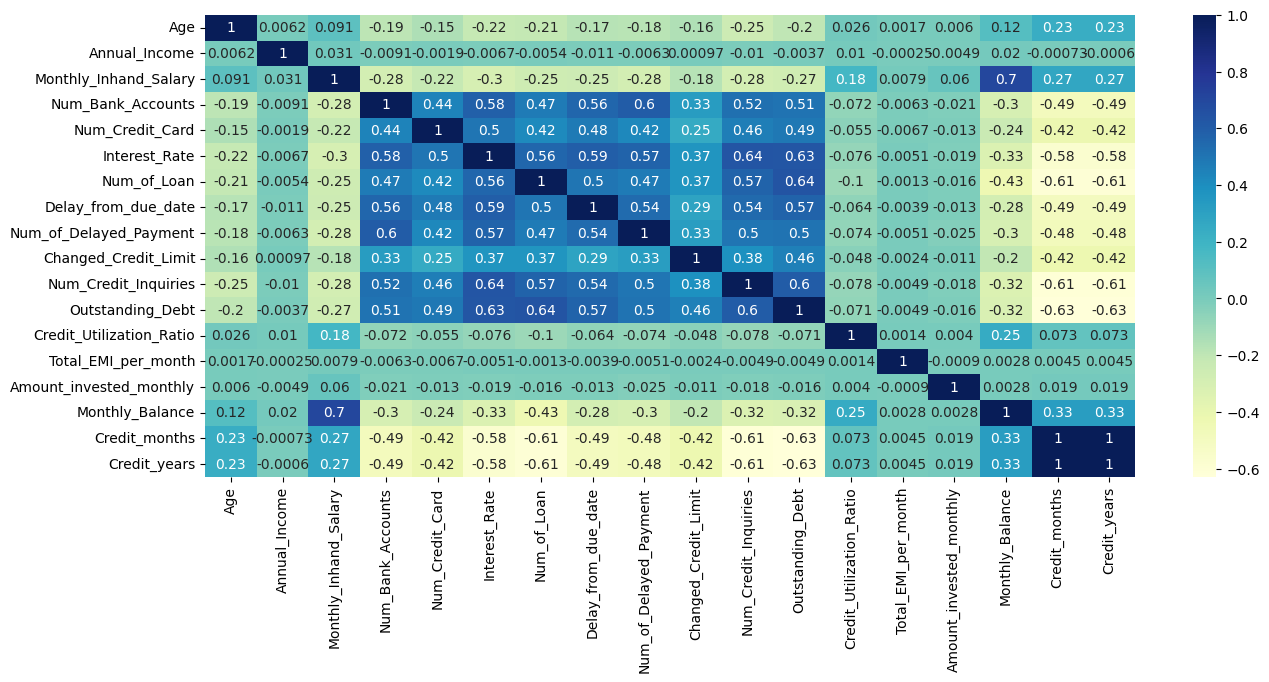

In [71]:
plt.figure(figsize=(15,6))
sns.heatmap(data, cmap="YlGnBu", annot=True)
plt.show()

## Positive Correlations
- Higher monthly in-hand salary is strongly associated with a higher monthly balance.
- More bank accounts and credit cards tend to be associated with more loans.
- Higher interest rates are associated with higher outstanding debt.
- A higher credit utilization ratio is somewhat associated with higher outstanding debt.

## Negative Correlations
- Delays in payment are associated with lower monthly balances.
- A higher credit utilization ratio has a small positive relationship with monthly balance, which might indicate that those with higher utilization ratios maintain a slightly higher balance
- More delayed payments are linked to more loans and higher outstanding debt.



<Axes: xlabel='Occupation', ylabel='count'>

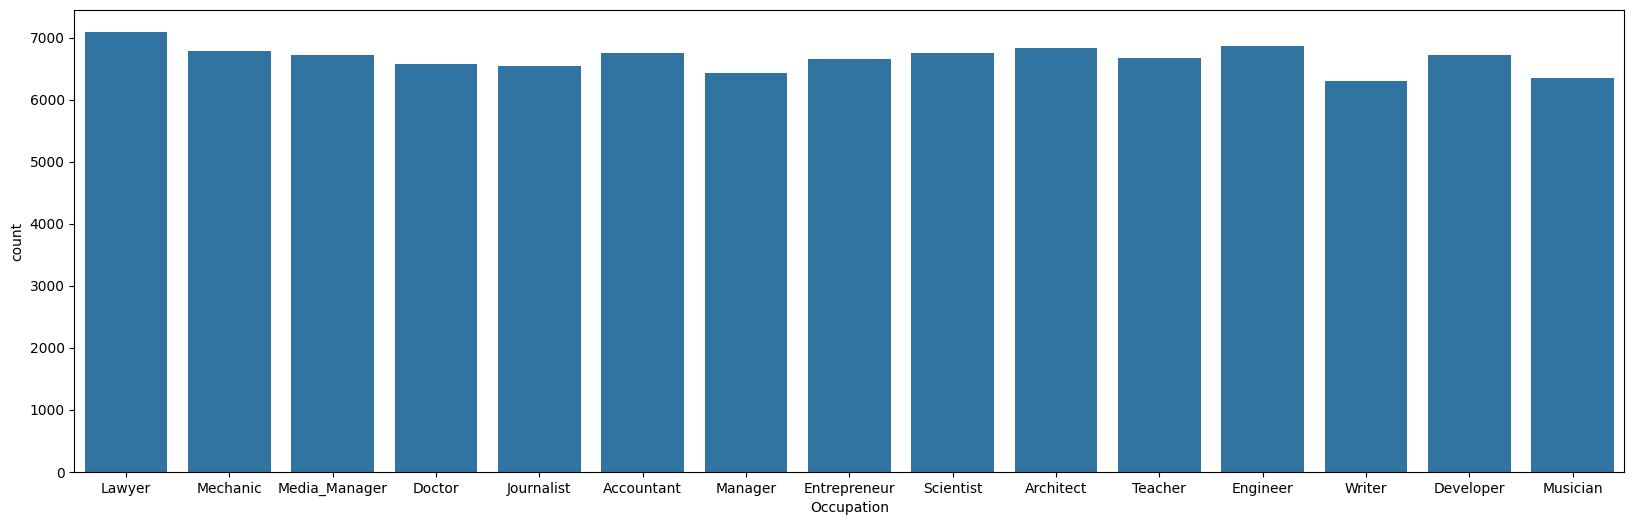

In [72]:
plt.figure(figsize=(20,6))
sns.countplot(x='Occupation',data=df1)

Insights
- The distribution is almost uniform across all the categories of occupation

<Axes: xlabel='Occupation', ylabel='count'>

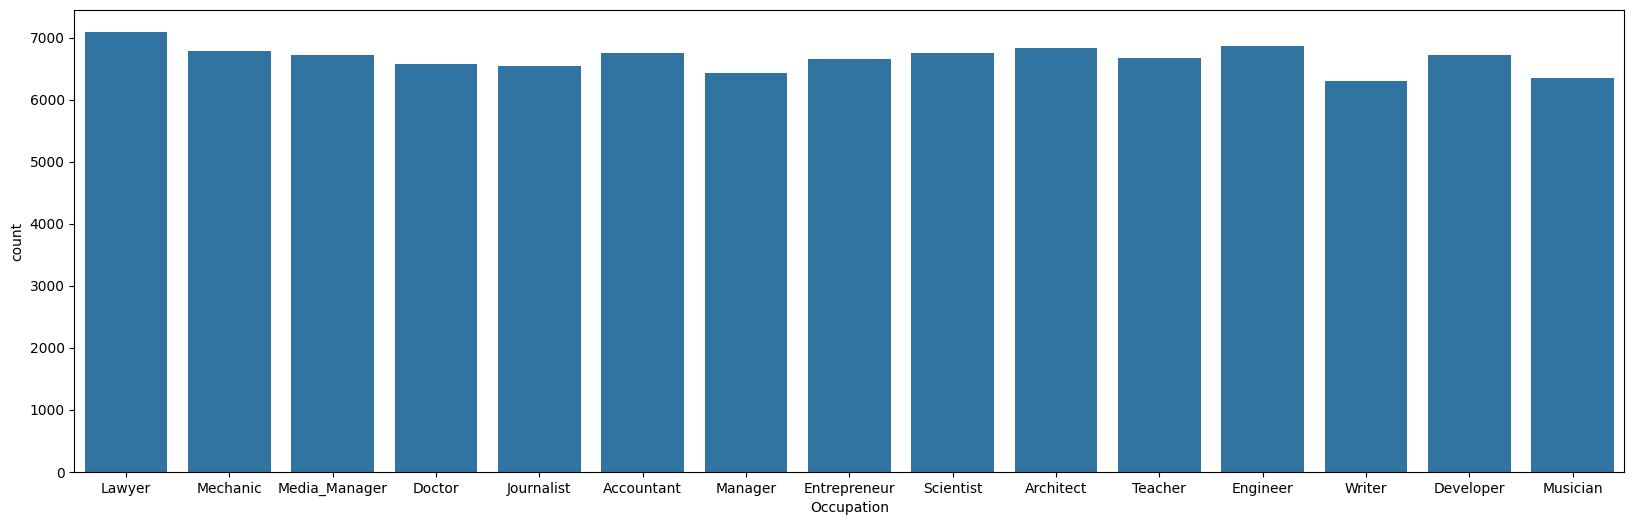

In [73]:
plt.figure(figsize=(20,6))
sns.countplot(x='Occupation',data=df1)

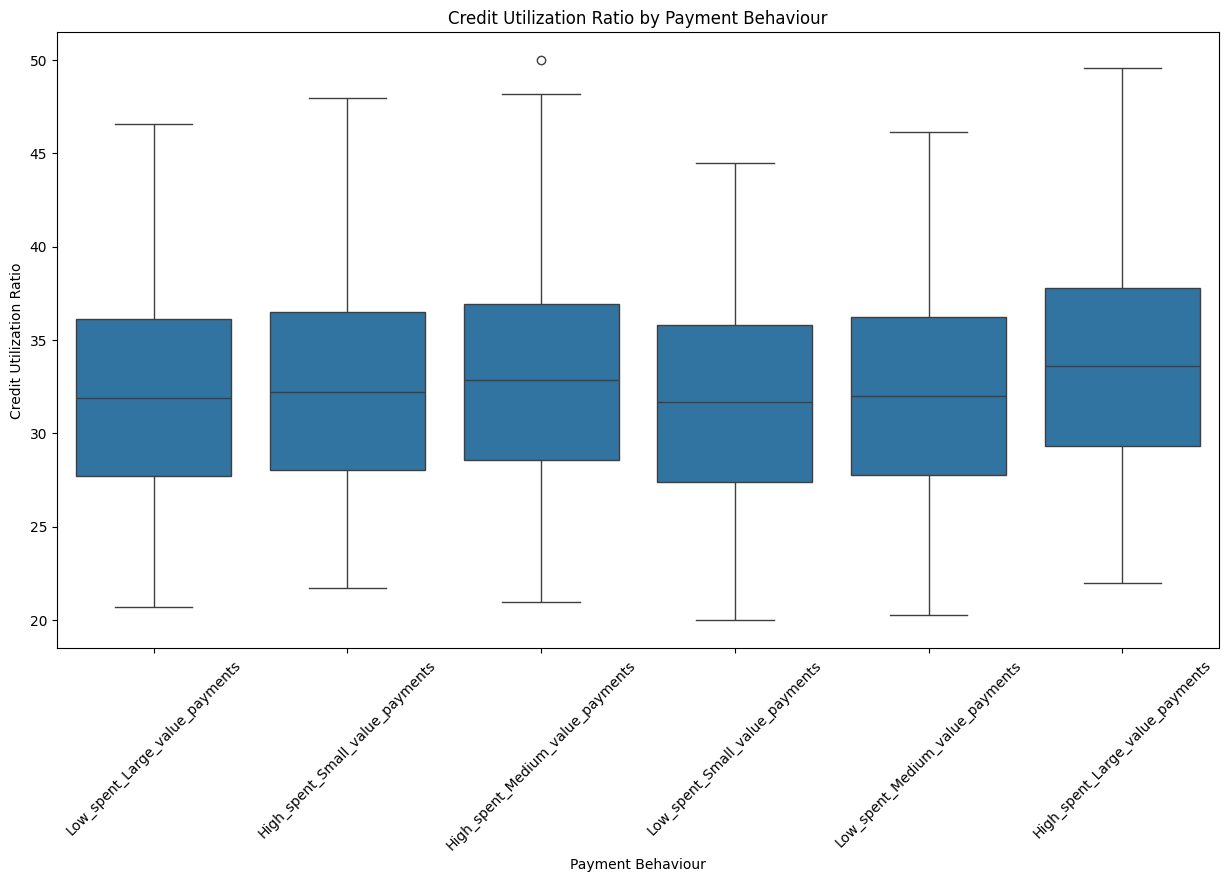

In [74]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Payment_Behaviour', y='Credit_Utilization_Ratio', data=df1)
plt.title('Credit Utilization Ratio by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Credit Utilization Ratio')
plt.xticks(rotation=45)
plt.show()

 Insights
 - All payment behavior categories exhibit similar median Credit Utilization Ratios, which appear to be around 30-35.


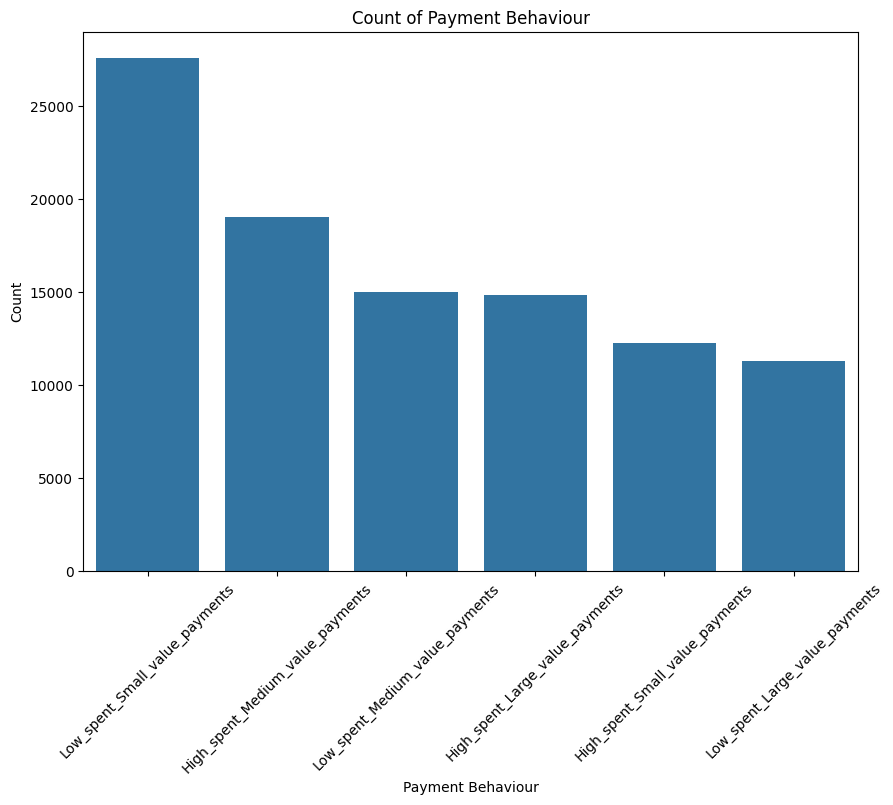

In [75]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Payment_Behaviour', data=df1,order = df1['Payment_Behaviour'].value_counts().index)
plt.title('Count of Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


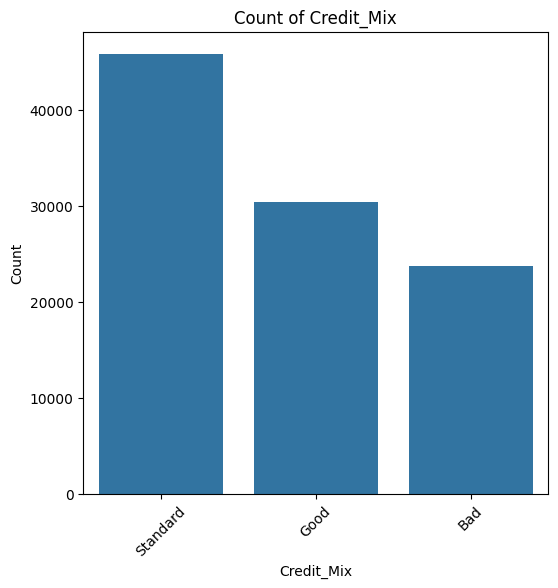

In [76]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Credit_Mix', data=df1,order = df1['Credit_Mix'].value_counts().index)
plt.title('Count of Credit_Mix')
plt.xlabel('Credit_Mix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Low spent smaller values payments and standard credit mix have max frequencies

In [77]:
df1.groupby(['Credit_Mix'])['Num_Credit_Card'].value_counts().reset_index()

,Credit_Mix,Num_Credit_Card,count
0,Bad,7,4057
1,Bad,8,4017
2,Bad,5,3997
3,Bad,6,3985
4,Bad,10,3864
5,Bad,9,3819
6,Bad,4,29
7,Good,5,6144
8,Good,4,6071
9,Good,3,5668


In [78]:
df1['Credit_Utilization_Category'] = pd.cut(df1['Credit_Utilization_Ratio'], bins=[0, 10, 30, 50, 70, 100], labels=['0-10%', '10-30%', '30-50%', '50-70%', '70-100%'])
credit_mix_vs_credit_utilization = pd.crosstab(df1['Credit_Mix'], df1['Credit_Utilization_Category'],normalize=True)
credit_mix_vs_credit_utilization*100


Credit_Utilization_Category,10-30%,30-50%
Credit_Mix,,
Bad,9.459000,14.309000
Good,9.958000,20.426000
Standard,16.945000,28.903000


 - **Credit Utilization (10-30%):**

   - Bad credit mix: 9.459
   - Good credit mix: 9.958
   - Standard credit mix: 16.945

- **Credit Utilization (30-50%):**

   - Bad credit mix: 14.309
   - Good credit mix: 20.426

  - Standard credit mix: 28.903

In [79]:
df1['Payment_Behaviour'].unique()

array(['Low_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

## Calculation Of Credit Score:


- 1. Payment History (35%):
  - Payment_of_Min_Amount
  - Num_of_Delayed_Payment
  - Delay_from_due_date
- 2. Accounts Owed (30%):
  - Outstanding_Debt
  - Credit_Utilization_Ratio
  - Total_EMI_per_month
- 3. Length of Credit History (15%)
  - Credit_History_Age_Months
- 4. Credit Mix (10%)
  - Credit_Mix
  - Num_Bank_Accounts
  - Num_Credit_Card
  - Num_of_Loan
- 5. New Credit (10%)
  -Num_Credit_Inquiries

### Assigning Scaling points to categories

In [80]:


# Create a new column for Credit History Age in months
df1['Credit_History_Age_Months'] = (df1['Credit_years'] * 12) + df1['Credit_months']

# Map Payment_Behaviour to numerical scores
payment_behaviour_map = {
    'Low_spent_Large_value_payments': 1,
    'High_spent_Small_value_payments': 2,
    'High_spent_Medium_value_payments': 3,
    'Low_spent_Small_value_payments': 4,
    'Low_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 6
}
df1['Payment_Behaviour_Score'] = df1['Payment_Behaviour'].map(payment_behaviour_map)

# Define the scoring function for Credit Utilization Ratio
def credit_utilization_score(ratio):
    if ratio <= 0.10:
        return 1.0  # Highest points
    elif ratio <= 0.30:
        return 0.5  # Medium points
    else:
        return 0.0  # Lowest points


### Aggregating Data on customer Level

In [81]:
# Aggregating the data for each customer
df_aggregated = df1.groupby('Customer_ID').agg({
    'Payment_of_Min_Amount': 'last',
    'Num_of_Delayed_Payment': 'sum',
    'Delay_from_due_date': 'sum',
    'Outstanding_Debt': 'mean',
    'Credit_Utilization_Ratio': 'mean',
    'Total_EMI_per_month': 'mean',
    'Credit_History_Age_Months': 'last',
    'Num_Credit_Inquiries': 'sum',
    'Num_Bank_Accounts': 'mean',
    'Num_Credit_Card': 'mean',
    'Num_of_Loan': 'mean',
    'Credit_Mix': 'last',
    'Payment_Behaviour_Score': 'last'
}).reset_index()




# Apply the scoring function
df_aggregated['Credit_Utilization_Ratio_Score'] = df_aggregated['Credit_Utilization_Ratio'].apply(credit_utilization_score)



In [82]:
df_aggregated.head(5)

,Customer_ID,Payment_of_Min_Amount,Num_of_Delayed_Payment,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_History_Age_Months,Num_Credit_Inquiries,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Credit_Mix,Payment_Behaviour_Score,Credit_Utilization_Ratio_Score
0,CUS_0x1000,Yes,200,498,1562.910000,33.477546,42.941090,249.000000,87,6.000000,5.000000,2.000000,Bad,3,0.000000
1,CUS_0x1009,Yes,141,58,202.680000,29.839984,108.366467,744.000000,24,6.000000,5.000000,4.000000,Standard,3,0.000000
2,CUS_0x100b,No,59,108,1030.200000,34.841449,0.000000,370.000000,14,1.000000,4.000000,0.000000,Good,2,0.000000
3,CUS_0x1011,Yes,114,218,473.140000,27.655897,123.434939,370.000000,56,3.000000,3.000000,3.000000,Standard,5,0.000000
4,CUS_0x1013,No,68,100,1233.510000,31.933940,6266.765823,418.000000,24,3.000000,3.000000,3.000000,Good,3,0.000000


### Creating new features by scaling the features

In [83]:
# Define the normalization functions for other factors
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

# Apply min-max scaling to the relevant columns
df_aggregated['Num_of_Delayed_Payment_scaled'] = min_max_scaling(df_aggregated['Num_of_Delayed_Payment'])
df_aggregated['Delay_from_due_date_scaled'] = min_max_scaling(df_aggregated['Delay_from_due_date'])
df_aggregated['Outstanding_Debt_scaled'] = min_max_scaling(df_aggregated['Outstanding_Debt'])
df_aggregated['Total_EMI_per_month_scaled'] = min_max_scaling(df_aggregated['Total_EMI_per_month'])
df_aggregated['Credit_History_Age_Months_scaled'] = min_max_scaling(df_aggregated['Credit_History_Age_Months'])
df_aggregated['Num_Credit_Inquiries_scaled'] = min_max_scaling(df_aggregated['Num_Credit_Inquiries'])
df_aggregated['Num_Bank_Accounts_scaled'] = min_max_scaling(df_aggregated['Num_Bank_Accounts'])
df_aggregated['Num_Credit_Card_scaled'] = min_max_scaling(df_aggregated['Num_Credit_Card'])
df_aggregated['Num_of_Loan_scaled'] = min_max_scaling(df_aggregated['Num_of_Loan'])
df_aggregated['Payment_Behaviour_Score_scaled'] = min_max_scaling(df_aggregated['Payment_Behaviour_Score'])


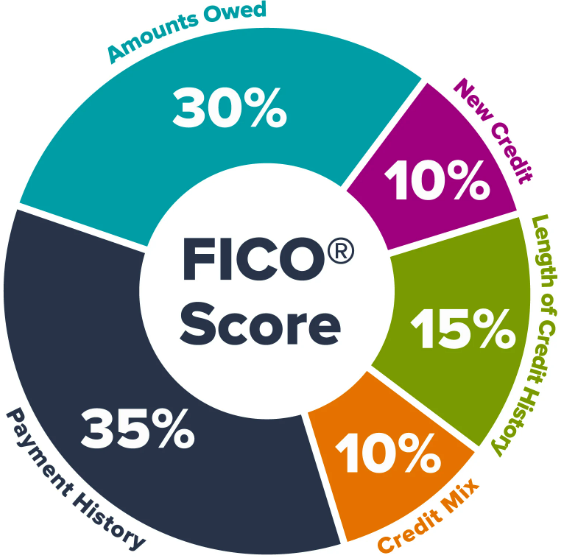

## Applying factor-based normalization to credit score data.

In [84]:

# Define functions to normalize each factor
def normalize_payment_history(row):
    return (row['Payment_of_Min_Amount'] == 'Yes') * 0.7 + (1 - row['Num_of_Delayed_Payment_scaled']) * 0.2 + (1 - row['Delay_from_due_date_scaled']) * 0.1

def normalize_amounts_owed(row):
    return (1 - row['Outstanding_Debt_scaled']) * 0.5 + (row['Credit_Utilization_Ratio_Score']) * 0.3 + (1 - row['Total_EMI_per_month_scaled']) * 0.2

def normalize_length_of_credit_history(row):
    return row['Credit_History_Age_Months_scaled']

def normalize_new_credit(row):
    return (1 - row['Num_Credit_Inquiries_scaled'])

def normalize_credit_mix(row):
    credit_mix_score = 0
    if row['Credit_Mix'] == 'Good':
        credit_mix_score = 1
    elif row['Credit_Mix'] == 'Standard':
        credit_mix_score = 0.5
    elif row['Credit_Mix'] == 'Bad':
        credit_mix_score = 0
    return (row['Num_Bank_Accounts_scaled'] * 0.25 +
            row['Num_Credit_Card_scaled'] * 0.25 +
            row['Num_of_Loan_scaled'] * 0.25 +
            credit_mix_score * 0.25)

def normalize_payment_behaviour(row):
    return row['Payment_Behaviour_Score_scaled'] * 0.1

# Normalize each factor for all rows
df_aggregated['Payment_History_Score'] = df_aggregated.apply(normalize_payment_history, axis=1)
df_aggregated['Amounts_Owed_Score'] = df_aggregated.apply(normalize_amounts_owed, axis=1)
df_aggregated['Length_of_Credit_History_Score'] = df_aggregated.apply(normalize_length_of_credit_history, axis=1)
df_aggregated['New_Credit_Score'] = df_aggregated.apply(normalize_new_credit, axis=1)
df_aggregated['Credit_Mix_Score'] = df_aggregated.apply(normalize_credit_mix, axis=1)
df_aggregated['Payment_Behaviour_Score'] = df_aggregated.apply(normalize_payment_behaviour, axis=1)

# Calculate the final credit score
df_aggregated['Credit_Score'] = (df_aggregated['Payment_History_Score'] * 0.35 +
                                 df_aggregated['Amounts_Owed_Score'] * 0.30 +
                                 df_aggregated['Length_of_Credit_History_Score'] * 0.15 +
                                 df_aggregated['New_Credit_Score'] * 0.10 +
                                 df_aggregated['Credit_Mix_Score'] * 0.10 +
                                 df_aggregated['Payment_Behaviour_Score'] * 0.05)  # Adjust weight if needed

df_aggregated['Credit_Score'] = 300 + (df_aggregated['Credit_Score'] * 550)

df_aggregated.to_csv('credit_scores_aggregated.csv', index=False)



## factor wise score and credit score.


In [85]:
df_aggregated[['Customer_ID','Payment_History_Score','Amounts_Owed_Score','Length_of_Credit_History_Score','New_Credit_Score','Credit_Mix_Score','Credit_Score']]

,Customer_ID,Payment_History_Score,Amounts_Owed_Score,Length_of_Credit_History_Score,New_Credit_Score,Credit_Mix_Score,Credit_Score
0,CUS_0x1000,0.712008,0.543378,0.304293,0.275000,0.323977,585.866717
1,CUS_0x1009,0.854888,0.679023,0.929293,0.800000,0.504532,726.120801
2,CUS_0x100b,0.222732,0.596958,0.457071,0.883333,0.367105,548.406508
3,CUS_0x1011,0.848860,0.651865,0.457071,0.533333,0.349123,659.406769
4,CUS_0x1013,0.215782,0.534822,0.517677,0.800000,0.474123,543.668752
...,...,...,...,...,...,...,...
12495,CUS_0xff3,0.215230,0.576840,0.508838,0.716667,0.478070,545.949951
12496,CUS_0xff4,0.882958,0.623470,0.546717,0.666667,0.634942,691.734660
12497,CUS_0xff6,0.268995,0.665334,0.731061,0.866667,0.575292,603.381820
12498,CUS_0xffc,0.805038,0.568134,0.385101,0.175000,0.569591,624.185315


In [86]:
df_aggregated.head()

,Customer_ID,Payment_of_Min_Amount,Num_of_Delayed_Payment,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_History_Age_Months,Num_Credit_Inquiries,Num_Bank_Accounts,...,Num_Bank_Accounts_scaled,Num_Credit_Card_scaled,Num_of_Loan_scaled,Payment_Behaviour_Score_scaled,Payment_History_Score,Amounts_Owed_Score,Length_of_Credit_History_Score,New_Credit_Score,Credit_Mix_Score,Credit_Score
0,CUS_0x1000,Yes,200,498,1562.910000,33.477546,42.941090,249.000000,87,6.000000,...,0.600000,0.473684,0.222222,0.400000,0.712008,0.543378,0.304293,0.275000,0.323977,585.866717
1,CUS_0x1009,Yes,141,58,202.680000,29.839984,108.366467,744.000000,24,6.000000,...,0.600000,0.473684,0.444444,0.400000,0.854888,0.679023,0.929293,0.800000,0.504532,726.120801
2,CUS_0x100b,No,59,108,1030.200000,34.841449,0.000000,370.000000,14,1.000000,...,0.100000,0.368421,0.000000,0.200000,0.222732,0.596958,0.457071,0.883333,0.367105,548.406508
3,CUS_0x1011,Yes,114,218,473.140000,27.655897,123.434939,370.000000,56,3.000000,...,0.300000,0.263158,0.333333,0.800000,0.848860,0.651865,0.457071,0.533333,0.349123,659.406769
4,CUS_0x1013,No,68,100,1233.510000,31.933940,6266.765823,418.000000,24,3.000000,...,0.300000,0.263158,0.333333,0.400000,0.215782,0.534822,0.517677,0.800000,0.474123,543.668752


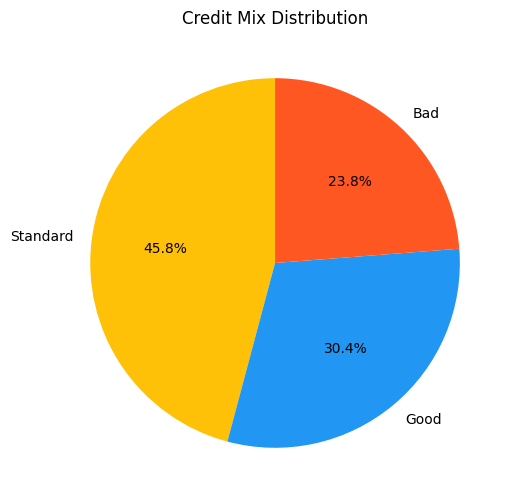

In [87]:
credit_mix_distribution = df_aggregated['Credit_Mix'].value_counts()
plt.figure(figsize=(8, 6))
credit_mix_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#FFC107', '#2196F3', '#FF5722'])
plt.title('Credit Mix Distribution')
plt.ylabel('')
plt.show()



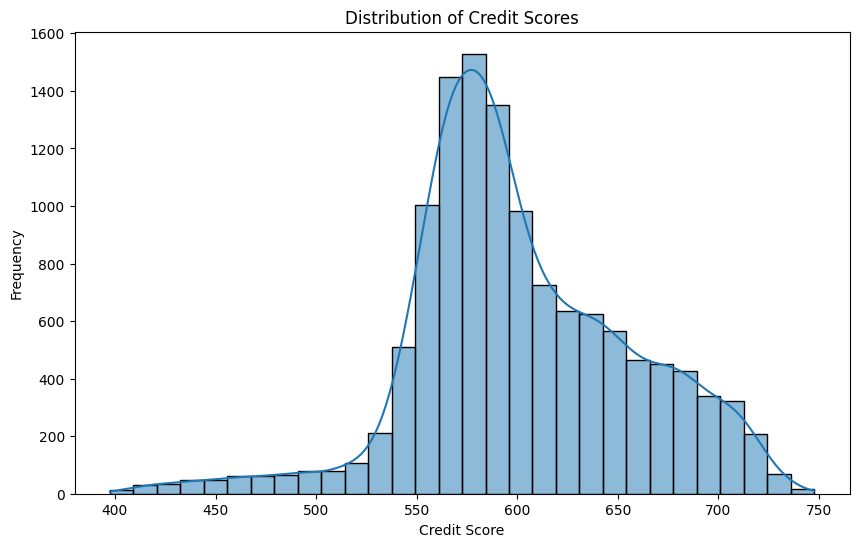

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df_aggregated['Credit_Score'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

Final Insights:

- The highest frequency of credit scores is around 630-640, indicating that a significant portion of individuals fall within this range.
- The credit scores range from approximately 400 to 750, providing a broad perspective on the creditworthiness of individuals in the dataset.
- There are fewer individuals with scores above 700, indicating that only a small portion of the population has excellent credit.
- The central tendency of the credit scores is around 600-650, which can be considered the average credit score range for the population in this dataset


# Recommndations:
- Provide credit utilization monitoring tools and alerts to help customers maintain their utilization ratios below 30%.
- Target segment (credit score > 700) with premium credit cards, wealth management, and high-interest savings accounts.
- Focus on customers with credit scores between 650-700 by offering balance transfer credit cards, personal loans, and home loan options to meet their financial needs and build loyalty.
- Run targeted marketing campaigns tailored to different customer segments to effectively reach and engage them.
-Introduce payment reminders and flexible repayment options to help customers avoid payment delays and improve financial health.
